In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("dataset/train/Closed/_0.jpg", cv2.IMREAD_GRAYSCALE)

TypeError: Image data of dtype object cannot be converted to float

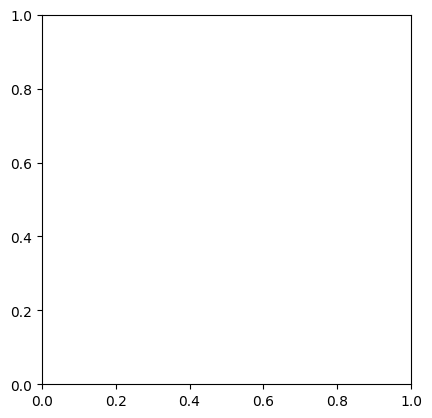

In [4]:
plt.imshow(img_array,cmap="gray")

In [ ]:
img_array.shape

(145, 145)

In [5]:
Datadirectory = "dataset/train"
Classes = ["Closed","Open"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/train\\Closed'

In [6]:
img_size = 224
new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

NameError: name 'backtorgb' is not defined

In [7]:
img_array.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/train\\Closed'

In [10]:
print(len(training_Data))

0


In [11]:
import random
random.shuffle(training_Data)

In [12]:
X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size,3)
    

In [13]:
X.shape

(0, 224, 224, 3)

In [14]:
X=X/255.0;

In [15]:
Y= np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [18]:
import keras
from tensorflow.keras import layers
from keras import backend as K

In [19]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 3s 0us/step


In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [22]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [24]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(X,Y, epochs = 50, validation_split = 0.1)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

In [27]:
new_model.save('my_model.h5')

c:\Users\WELCOME\anaconda3\envs\machinelearning\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
new_model = tf.keras.models.load_model('my_model.h5')

In [30]:
img_array = cv2.imread("dataset/train/Closed/_0.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [32]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [33]:
X_input.shape

(1, 224, 224, 3)

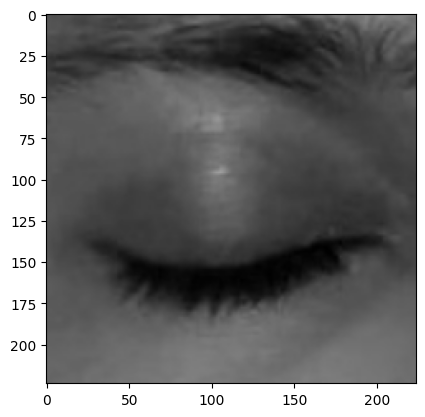

In [34]:
plt.imshow(new_array)

In [35]:
X_input = X_input/255.0

In [36]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 252ms/step


In [38]:
prediction

array([[22.758394]], dtype=float32)

In [39]:
#CHECK IMAGE FROM INTERNET

In [44]:
img = cv2.imread('testimage.jpg')

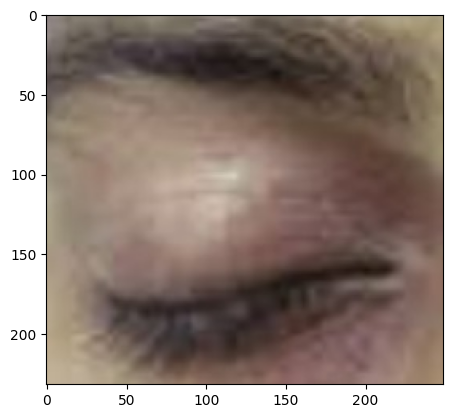

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
face=Cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_forntalface_default.xml')

In [47]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [49]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [50]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0))

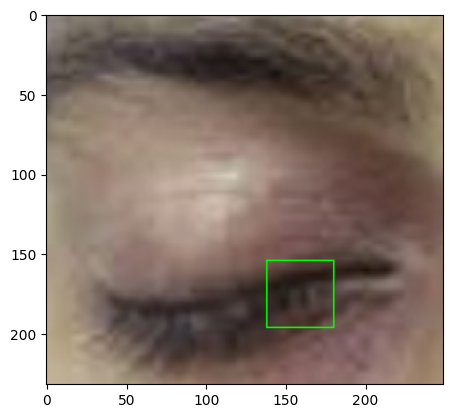

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


Eyes are not detected in the region of interest


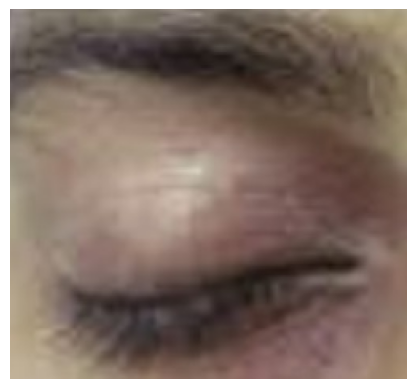

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define the image path
image_path = 'testimage.jpg'

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image from BGR to GRAY
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load the eye cascade classifier
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    if len(eyes) == 0:
        print("No eyes detected")
    else:
        for (x, y, w, h) in eyes:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyess = eye_cascade.detectMultiScale(roi_gray)
            if len(eyess) == 0:
                print("Eyes are not detected in the region of interest")
            else:
                for (ex, ey, ew, eh) in eyess:
                    eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
                    # Draw rectangle around the eyes
                    cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 0, 0), 2)
                    
    # Display the output
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off') # Hide the axis
    plt.show()


In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

NameError: name 'eyes_roi' is not defined

In [ ]:
eyes_roi.shape

In [ ]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [ ]:
new_model.predict(final_image)

In [ ]:
#REALTIME VIDEO DEMO

In [7]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained model (replace with the actual path to your model)
new_model = load_model('my_model.h5')

# Load the cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default camera
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
            try:
                # Preprocess the eye ROI for prediction
                final_image = cv2.resize(eyes_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = final_image / 255.0

                # Predict eye status
                predictions = new_model.predict(final_image)
                status = "Open Eyes" if predictions[0][0] > 0.5 else "Closed Eyes"
            except Exception as e:
                print(f"Error processing eye ROI: {e}")
                status = "Unknown"

            # Draw rectangle around eyes and put status text
            cv2.rectangle(frame, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)
            cv2.putText(frame, status, (x + ex, y + ey - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Draw rectangle around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the output frame
    cv2.imshow('Drowsiness Detection Program', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 65ms/step


In [6]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


Model file not found: Drowsiness_Detection_model_CNN.h5


: 